# Time Series with Financial Data

Financial analysts use time series data such as stock price movements, or a company’s sales over time, to analyze a company’s performance [see](https://corporatefinanceinstitute.com/resources/data-science/time-series-data-analysis/).

Investors can take advantage of new growth investing strategies in order to more precisely hone in on stocks or other investments offering above-average profit potential. When it comes to investing in the stock market, there are always a variety of approaches that can be taken. The goal, however, is generally always the same, regardless of the approach – grow your investments and increase your profits [see](https://corporatefinanceinstitute.com/resources/capital-markets/a-guide-to-growth-investing/)

<br>

---  
Source:  
+ [Candle Stick Charts with Plotly](https://plotly.com/python/candlestick-charts/)  
+ [Scatter Plot of Financial Data with Plotly](https://plotly.com/python/line-and-scatter/)  
+ [Bar Race Charts](https://www.analyticsvidhya.com/blog/2021/07/construct-various-types-of-bar-race-charts-with-plotly/)
+ [Feature Engineering Techniques For Time Series Data](https://www.analyticsvidhya.com/blog/2019/12/6-powerful-feature-engineering-techniques-time-series/)
+ [Differencing Time Series](https://towardsdatascience.com/an-intuitive-guide-to-differencing-time-series-in-python-1d6c7a2c067a)

---  
Data ([from Yahoo Finance](https://finance.yahoo.com/)):
+ Credit Suisse Stock Market Price (April 2009 - March 2023) -- **DATA-CS.csv**
+ UBS Group Stock Market Price (April 2009 - March 2023) -- **DATA-UBS.csv**
---  

Author: 
+ dr. daniel benninger  

History:  
+ 2023-04-06 v2 dbe --- initial version for BINA FS23  
---

## Load Libraries and Check Environment

In [10]:
import pandas as pd
from datetime import datetime
import plotly.graph_objects as go

In [11]:
print(pd.__version__)

1.5.3


In [12]:
%ls
%cd sample_data

anscombe.json*                mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md*
[Errno 2] No such file or directory: 'sample_data'
/content/sample_data


## Load Financial Data and Verify Structure/Format/Values

In [13]:
# load the financial dataset from the BINA FS23 github repositors
path = 'https://raw.githubusercontent.com/sawubona-gmbh/BINA-FS23-WORK/main/LB10-Regression%2BTimeSeries/Python/DATA-CS.csv'
data = pd.read_csv(path)

# OPTION: load the financial dataset from a local file
# data = pd.read_csv('DATA-CS.csv')

In [14]:
data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-04-06,29.658203,30.937500,29.541016,30.703125,20.256773,3253043
1,2009-04-07,29.482422,29.960938,29.072266,29.482422,19.451399,1795584
2,2009-04-08,30.361328,30.908203,29.746094,30.644531,20.218113,1202688
3,2009-04-09,31.240234,33.027344,31.025391,32.841797,21.667789,2358579
4,2009-04-13,32.470703,34.423828,32.285156,33.974609,22.415174,1897062


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3524 entries, 0 to 3523
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3524 non-null   object 
 1   Open       3524 non-null   float64
 2   High       3524 non-null   float64
 3   Low        3524 non-null   float64
 4   Close      3524 non-null   float64
 5   Adj Close  3524 non-null   float64
 6   Volume     3524 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 192.8+ KB


In [16]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3524.000000,3524.000000,3524.000000,3524.000000,3524.000000,3.524000e+03
mean,21.714721,21.902277,21.504521,21.708342,16.745795,4.267032e+06
std,12.494230,12.609161,12.356681,12.490288,7.632176,1.254198e+07
min,0.820000,0.860000,0.820000,0.850000,0.850000,1.301500e+05
25%,12.090000,12.190000,12.020000,12.097500,11.051464,1.283234e+06
50%,17.231445,17.440703,17.124454,17.302578,14.742901,2.185800e+06
75%,28.840000,28.992500,28.625000,28.825000,21.594921,3.759675e+06
max,58.300781,58.671875,57.509766,58.437500,38.651604,4.341040e+08


In [17]:
# convert date colume to "datetime" format
data[["Date"]] = data[["Date"]].apply(pd.to_datetime)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3524 entries, 0 to 3523
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3524 non-null   datetime64[ns]
 1   Open       3524 non-null   float64       
 2   High       3524 non-null   float64       
 3   Low        3524 non-null   float64       
 4   Close      3524 non-null   float64       
 5   Adj Close  3524 non-null   float64       
 6   Volume     3524 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 192.8 KB


--- 
## Select time range and plot time series
Select a specific timeframe

In [19]:
df= data[(data['Date'] > "2018-01-01") & (data['Date'] < "2019-01-01")]
# df= data[(data['Date'] > "2018-01-01")]

and plot the financial time series OHLC as **candlesticks** using *plotly.graph_objects*

In [20]:
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.update_layout(
    title="Finance Institutes - Stock Market Price <br><sup>CREDIT SUISSE</sup>",
    yaxis_title='US$',
        width=1000, height=600,
    yaxis_range = (0,25))
    

fig.show()

## Some Feature Engineering Techniques applied to Financial Time Series Data

### **Date-Related** Features   
Information about the day, month, year e.g. *day of the week*, *quarter*, *day/week of year* etc. 

In [21]:
data['year']=data['Date'].dt.year 
data['month']=data['Date'].dt.month 
data['day']=data['Date'].dt.day

data['dayofweek_num']=data['Date'].dt.dayofweek  
data['dayofyear_num']=data['Date'].dt.dayofyear 
data['weekofyear_num']=data['Date'].dt.week
data['quarter_num']=data['Date'].dt.quarter
data['daysinmonth_num']=data['Date'].dt.days_in_month

data.head()

<ipython-input-21-d7df8bb37f5a>:7: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.



,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day,dayofweek_num,dayofyear_num,weekofyear_num,quarter_num,daysinmonth_num
0,2009-04-06,29.658203,30.937500,29.541016,30.703125,20.256773,3253043,2009,4,6,0,96,15,2,30
1,2009-04-07,29.482422,29.960938,29.072266,29.482422,19.451399,1795584,2009,4,7,1,97,15,2,30
2,2009-04-08,30.361328,30.908203,29.746094,30.644531,20.218113,1202688,2009,4,8,2,98,15,2,30
3,2009-04-09,31.240234,33.027344,31.025391,32.841797,21.667789,2358579,2009,4,9,3,99,15,2,30
4,2009-04-13,32.470703,34.423828,32.285156,33.974609,22.415174,1897062,2009,4,13,0,103,16,2,30


---  
### **Lag-Related** Features  
If we like predicting the stock price for a company. So, the previous day’s stock price is important to make a prediction. In other words, the value at time t is greatly affected by the value at time t-1. The past values are known as lags, so t-1 is lag 1, t-2 is lag 2, and so on.

In [22]:
data['lag_1'] = data['Close'].shift(1)

dataX = data[['Date', 'lag_1', 'Close']]
dataX.head()

,Date,lag_1,Close
0,2009-04-06,NaN,30.703125
1,2009-04-07,30.703125,29.482422
2,2009-04-08,29.482422,30.644531
3,2009-04-09,30.644531,32.841797
4,2009-04-13,32.841797,33.974609


In [23]:
dataX['performance_1']=dataX['Close']-dataX['lag_1']

dataX.head()

<ipython-input-23-8f4c8b051d68>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,lag_1,Close,performance_1
0,2009-04-06,NaN,30.703125,NaN
1,2009-04-07,30.703125,29.482422,-1.220703
2,2009-04-08,29.482422,30.644531,1.162109
3,2009-04-09,30.644531,32.841797,2.197266
4,2009-04-13,32.841797,33.974609,1.132812


If the series has a weekly trend, which means the value last Monday can be used to predict the value for this Monday, we should create lag features for seven days. 

We can create multiple lag features as well! Let’s say we want lag 1 to lag 7 – we can let the model decide which is the most valuable one. So, if we train a linear regression model, it will assign appropriate weights (or coefficients) to the lag features

In [24]:
data['lag_1'] = data['Close'].shift(1)
data['lag_2'] = data['Close'].shift(2)
data['lag_3'] = data['Close'].shift(3)
data['lag_4'] = data['Close'].shift(4)
data['lag_5'] = data['Close'].shift(5)
data['lag_6'] = data['Close'].shift(6)
data['lag_7'] = data['Close'].shift(7)

dataX = data[['Date', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7', 'Close']]
dataX.head(10)

,Date,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,Close
0,2009-04-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.703125
1,2009-04-07,30.703125,NaN,NaN,NaN,NaN,NaN,NaN,29.482422
2,2009-04-08,29.482422,30.703125,NaN,NaN,NaN,NaN,NaN,30.644531
3,2009-04-09,30.644531,29.482422,30.703125,NaN,NaN,NaN,NaN,32.841797
4,2009-04-13,32.841797,30.644531,29.482422,30.703125,NaN,NaN,NaN,33.974609
5,2009-04-14,33.974609,32.841797,30.644531,29.482422,30.703125,NaN,NaN,31.689453
6,2009-04-15,31.689453,33.974609,32.841797,30.644531,29.482422,30.703125,NaN,32.910156
7,2009-04-16,32.910156,31.689453,33.974609,32.841797,30.644531,29.482422,30.703125,35.087891
8,2009-04-17,35.087891,32.910156,31.689453,33.974609,32.841797,30.644531,29.482422,33.300781
9,2009-04-20,33.300781,35.087891,32.910156,31.689453,33.974609,32.841797,30.644531,30.361328


---  
### **Rolling Window** Features  
How about calculating some statistical values based on past values? This method is called the rolling window method because the window would be different for every data point.  

We will select a window size, take the average of the values in the window, and use it as a feature.

In [25]:
data['rolling_mean7'] = data['Close'].rolling(window=7).mean()

dataX = data[['Date', 'rolling_mean7', 'Close']]
dataX.head(10)

,Date,rolling_mean7,Close
0,2009-04-06,NaN,30.703125
1,2009-04-07,NaN,29.482422
2,2009-04-08,NaN,30.644531
3,2009-04-09,NaN,32.841797
4,2009-04-13,NaN,33.974609
5,2009-04-14,NaN,31.689453
6,2009-04-15,31.749442,32.910156
7,2009-04-16,32.375837,35.087891
8,2009-04-17,32.921317,33.300781
9,2009-04-20,32.880859,30.361328


In [26]:
import plotly.express as px
df= dataX[(dataX['Date'] > "2019-01-01") & (dataX['Date'] < "2019-12-31")]
#df.info()

# Create Line plot
fig = px.line(df, x=df['Date'], y=['Close', 'rolling_mean7'])


# Setup Layout
fig.update_layout(
    title="Finance Institutes - Stock Market Price with Rolling Means <br><sup>CREDIT SUISSE</sup>",
    legend_title="Data Points",
    yaxis_title='US$',
    width=1000, height=600,
    yaxis_range = (10,15))

# Display the plot
fig.show()

In [27]:
data['rolling_mean20'] = data['Close'].rolling(window=20).mean()
data['rolling_mean60'] = data['Close'].rolling(window=60).mean()

dataY = data[['Date', 'Close','rolling_mean20','rolling_mean60',]]
dataY.head(25)

,Date,Close,rolling_mean20,rolling_mean60
0,2009-04-06,30.703125,NaN,NaN
1,2009-04-07,29.482422,NaN,NaN
2,2009-04-08,30.644531,NaN,NaN
3,2009-04-09,32.841797,NaN,NaN
4,2009-04-13,33.974609,NaN,NaN
5,2009-04-14,31.689453,NaN,NaN
6,2009-04-15,32.910156,NaN,NaN
7,2009-04-16,35.087891,NaN,NaN
8,2009-04-17,33.300781,NaN,NaN
9,2009-04-20,30.361328,NaN,NaN


In [28]:
import plotly.express as px
df= dataY[(dataY['Date'] > "2019-01-01") & (dataY['Date'] < "2019-12-31")]
#df.info()

# Create Line plot
fig = px.line(df, x=df['Date'], y=['Close', 'rolling_mean20','rolling_mean60'])


# Setup Layout
fig.update_layout(
    title="Finance Institutes - Stock Market Price with Rolling Means <br><sup>CREDIT SUISSE</sup>",
    legend_title="Data Points",
    yaxis_title='US$',
    width=1000, height=600,
    yaxis_range = (10,15))

# Display the plot
fig.show()

---  
### **Differencing** Time Series
Differencing is a method of transforming a time series dataset. Differencing is performed by subtracting the previous observation from the current observation.  

Differencing can help stabilize the mean of the time series by removing changes in the level of a time series, and so eliminating (or reducing) trend and seasonality. 

In [29]:
dataZ = data[['Date', 'Close']]
dataZ['diff1'] = dataZ['Close'].diff(periods=1)

dataZ.head()

<ipython-input-29-55cf9bddf0dc>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Close,diff1
0,2009-04-06,30.703125,NaN
1,2009-04-07,29.482422,-1.220703
2,2009-04-08,30.644531,1.162109
3,2009-04-09,32.841797,2.197266
4,2009-04-13,33.974609,1.132812


In [30]:
dataZ['diff2'] = dataZ['Close'].diff(periods=2)
dataZ['diff5'] = dataZ['Close'].diff(periods=5)

dataZ.head(10)

<ipython-input-30-7e2bdcedfedc>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-30-7e2bdcedfedc>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Close,diff1,diff2,diff5
0,2009-04-06,30.703125,NaN,NaN,NaN
1,2009-04-07,29.482422,-1.220703,NaN,NaN
2,2009-04-08,30.644531,1.162109,-0.058594,NaN
3,2009-04-09,32.841797,2.197266,3.359375,NaN
4,2009-04-13,33.974609,1.132812,3.330078,NaN
5,2009-04-14,31.689453,-2.285156,-1.152344,0.986328
6,2009-04-15,32.910156,1.220703,-1.064453,3.427734
7,2009-04-16,35.087891,2.177735,3.398438,4.443360
8,2009-04-17,33.300781,-1.787110,0.390625,0.458984
9,2009-04-20,30.361328,-2.939453,-4.726563,-3.613281


In [31]:
import plotly.express as px
df= dataZ[(dataZ['Date'] > "2019-01-01") & (dataZ['Date'] < "2019-12-31")]

# Create Line plot
fig = px.line(df, x=df['Date'], y=['Close', 'diff1','diff5'])


# Setup Layout
fig.update_layout(
    title="Finance Institutes - Stock Market Price with Differencing <br><sup>CREDIT SUISSE</sup>",
    legend_title="Data Points",
    yaxis_title='US$',
    width=1000, height=600,
    yaxis_range = (-15,15))

# Display the plot
fig.show()

---  
### **ADD ON:** Line or Bar Charts for Time Series?


In [35]:
dataZ = data[['Date', 'Close']]
dataZ.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3524 entries, 0 to 3523
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3524 non-null   datetime64[ns]
 1   Close   3524 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 55.2 KB


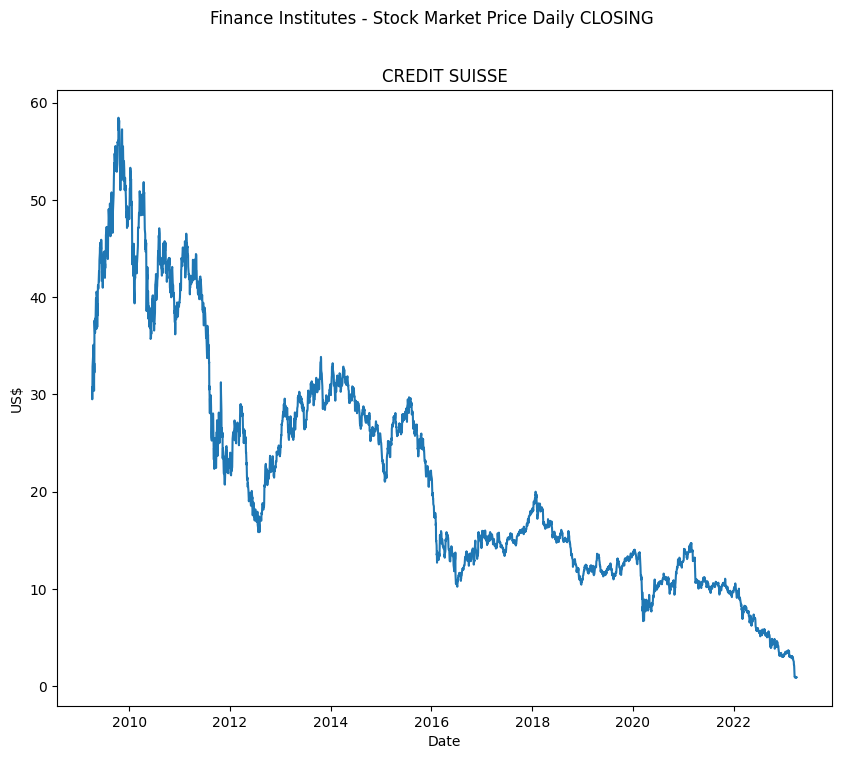

In [54]:
import matplotlib.pyplot as plt

dataZ = data[['Date', 'Close']]

plt.figure(figsize=(10, 8))
# as LINE chart
plt.plot(dataZ.Date, dataZ.Close)
# as BAR chart
#plt.bar(dataZ.Date, dataZ.Close)

plt.suptitle("Finance Institutes - Stock Market Price Daily CLOSING")
plt.title("CREDIT SUISSE")
plt.xlabel('Date')
plt.ylabel('US$')

plt.show()



---



---  
### **ADD ON:** Systematic Feature Engineering with *tsfresh*  
**tsfresh** is used for systematic feature engineering from time-series and other sequential data. These data have in common that they are ordered by an independent variable. The most common independent variable is time (time series).  
If we want to calculate different characteristics of time series such as the maximum or minimum, the average or the number of temporary peaks, without tsfresh, we have to calculate all those characteristics manually.  
tsfresh automates this process calculating and returning all those features automatically.

In [55]:
!pip install -U tsfresh

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.2/136.2 kB 16.3 MB/s eta 0:00:00


In [56]:
dataZ = data[['Date','Open','High','Low','Close','Volume','year','month','day']]
dataZ.head()

,Date,Open,High,Low,Close,Volume,year,month,day
0,2009-04-06,29.658203,30.937500,29.541016,30.703125,3253043,2009,4,6
1,2009-04-07,29.482422,29.960938,29.072266,29.482422,1795584,2009,4,7
2,2009-04-08,30.361328,30.908203,29.746094,30.644531,1202688,2009,4,8
3,2009-04-09,31.240234,33.027344,31.025391,32.841797,2358579,2009,4,9
4,2009-04-13,32.470703,34.423828,32.285156,33.974609,1897062,2009,4,13


In [57]:
# settings for feature extraction
from tsfresh.feature_extraction import ComprehensiveFCParameters
settings = ComprehensiveFCParameters()
# e.g. 
kind_to_fc_parameters = {
    "Open": {"mean": None},
    "Close": {"maximum": None, "minimum": None}
}

# automated feature extraction
from tsfresh.feature_extraction import extract_features
features = extract_features(dataZ, column_id="Date", column_sort="Date", default_fc_parameters=settings)

#features = extract_features(dataZ, column_id="Date", column_sort="Date")

Feature Extraction: 100%|██████████| 28192/28192 [15:23<00:00, 30.53it/s]


In [58]:
features.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3524 entries, 2009-04-06 to 2023-04-04
Columns: 6264 entries, Open__variance_larger_than_standard_deviation to day__mean_n_absolute_max__number_of_maxima_7
dtypes: float64(6264)
memory usage: 168.4 MB


In [59]:
features.head()

,Open__variance_larger_than_standard_deviation,Open__has_duplicate_max,Open__has_duplicate_min,Open__has_duplicate,Open__sum_values,Open__abs_energy,Open__mean_abs_change,Open__mean_change,Open__mean_second_derivative_central,Open__median,...,day__fourier_entropy__bins_5,day__fourier_entropy__bins_10,day__fourier_entropy__bins_100,day__permutation_entropy__dimension_3__tau_1,day__permutation_entropy__dimension_4__tau_1,day__permutation_entropy__dimension_5__tau_1,day__permutation_entropy__dimension_6__tau_1,day__permutation_entropy__dimension_7__tau_1,day__query_similarity_count__query_None__threshold_0.0,day__mean_n_absolute_max__number_of_maxima_7
2009-04-06,0.0,0.0,0.0,0.0,29.658203,879.609005,NaN,NaN,NaN,29.658203,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-04-07,0.0,0.0,0.0,0.0,29.482422,869.213207,NaN,NaN,NaN,29.482422,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-04-08,0.0,0.0,0.0,0.0,30.361328,921.810238,NaN,NaN,NaN,30.361328,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-04-09,0.0,0.0,0.0,0.0,31.240234,975.952220,NaN,NaN,NaN,31.240234,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-04-13,0.0,0.0,0.0,0.0,32.470703,1054.346553,NaN,NaN,NaN,32.470703,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
features.describe()

,Open__variance_larger_than_standard_deviation,Open__has_duplicate_max,Open__has_duplicate_min,Open__has_duplicate,Open__sum_values,Open__abs_energy,Open__mean_abs_change,Open__mean_change,Open__mean_second_derivative_central,Open__median,...,day__fourier_entropy__bins_5,day__fourier_entropy__bins_10,day__fourier_entropy__bins_100,day__permutation_entropy__dimension_3__tau_1,day__permutation_entropy__dimension_4__tau_1,day__permutation_entropy__dimension_5__tau_1,day__permutation_entropy__dimension_6__tau_1,day__permutation_entropy__dimension_7__tau_1,day__query_similarity_count__query_None__threshold_0.0,day__mean_n_absolute_max__number_of_maxima_7
count,3524.0,3524.0,3524.0,3524.0,3524.000000,3524.000000,0.0,0.0,0.0,3524.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,0.0,0.0,0.0,0.0,21.714721,627.590607,NaN,NaN,NaN,21.714721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.0,0.0,0.0,0.0,12.494230,682.723288,NaN,NaN,NaN,12.494230,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.0,0.0,0.0,0.0,0.820000,0.672400,NaN,NaN,NaN,0.820000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.0,0.0,0.0,0.0,12.090000,146.168100,NaN,NaN,NaN,12.090000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.0,0.0,0.0,0.0,17.231445,296.922738,NaN,NaN,NaN,17.231445,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,0.0,0.0,0.0,0.0,28.840000,831.745600,NaN,NaN,NaN,28.840000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,0.0,0.0,0.0,0.0,58.300781,3398.981065,NaN,NaN,NaN,58.300781,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
